In [37]:
# Simple CA simulator in Python
#
# *** Forest fire ***
#
# Copyright 2008-2012 Hiroki Sayama
# sayama@binghamton.edu

# Modified to run with Python 3

import matplotlib.pyplot as plt

from IPython.display import HTML
import tempfile; tempfile.tempdir='./'

import time as tm

%matplotlib inline

import pylab as PL
import random as RD
import scipy as SP
import numpy as np

width = 100
height = 100
initProb = 0.4
empty, tree, fire, char = range(4)

def init():
    global time, config, nextConfig

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))
    PL.show()

def step():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            state = fire
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config
    


<ipython-input-22-94be85d295db>:33: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  config = SP.zeros([height, width])
<ipython-input-22-94be85d295db>:43: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  nextConfig = SP.zeros([height, width])
MovieWriter imagemagick unavailable; using Pillow instead.


./tmpz0bcjvej.gif


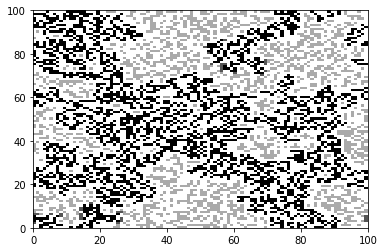

In [23]:
#animating the model

from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)

init()
for i in range(100):
    step()
    plt.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    camera.snap()

anim = camera.animate()

fname = tempfile.mktemp('.gif')
print(fname)
anim.save(fname, writer = 'imagemagick')
tm.sleep(0.1) # make sure file is saved
display(HTML("""
           <image style="width:200" src="{}" >
            """.format(fname)))

<ipython-input-37-6d36725e0f49>:34: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  config = SP.zeros([height, width])
<ipython-input-37-6d36725e0f49>:44: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  nextConfig = SP.zeros([height, width])


<ErrorbarContainer object of 3 artists>

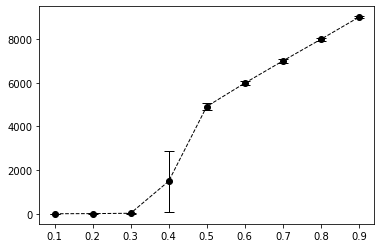

In [40]:
def getTotalBrun(config):
    total = 0

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == char:
                total+=1
    
    return total

totals = []
for i in range(1,10):
    initProb = i/10
    tot = []
    for _ in range(10):
        init()
        for i in range(100):
            step()
        tot.append(getTotalBrun(config))
    totals.append(tot)

plt.errorbar(x=[i/10 for i in range(1, 10)], y=[np.mean(i) for i in totals], yerr=[1.96*np.std(i) for i in totals],
            color='black', marker='o', capsize=5, linestyle='--', linewidth=1)

    

### Strech goal

In [49]:
width = 100
height = 100
initProb = 0.6
igniteProb = 0.6
empty, tree, fire, char = range(4)

def init():
    global time, config, nextConfig

    time = 0

    config = SP.zeros([height, width])
    for x in range(width):
        for y in range(height):
            if RD.random() < initProb:
                state = tree
            else:
                state = empty
            config[y, x] = state
    config[height//2, width//2] = fire

    nextConfig = SP.zeros([height, width])

def draw():
    PL.cla()
    PL.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    PL.axis('image')
    PL.title('t = ' + str(time))
    PL.show()

def step2():
    global time, config, nextConfig

    time += 1

    for x in range(width):
        for y in range(height):
            state = config[y, x]
            if state == fire:
                state = char
            elif state == tree:
                for dx in range(-1, 2):
                    for dy in range(-1, 2):
                        if config[(y+dy)%height, (x+dx)%width] == fire:
                            if RD.random() < igniteProb:
                                state = fire
            nextConfig[y, x] = state

    config, nextConfig = nextConfig, config

<ipython-input-49-7b60182f3cff>:12: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  config = SP.zeros([height, width])
<ipython-input-49-7b60182f3cff>:22: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  nextConfig = SP.zeros([height, width])
MovieWriter imagemagick unavailable; using Pillow instead.


./tmpfhbpw89l.gif


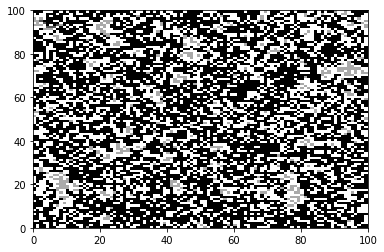

In [50]:
fig = plt.figure()
camera = Camera(fig)

init()
for i in range(100):
    step2()
    plt.pcolor(config, vmin = 0, vmax = 3, cmap = PL.cm.binary)
    camera.snap()

anim = camera.animate()

fname = tempfile.mktemp('.gif')
print(fname)
anim.save(fname, writer = 'imagemagick')
tm.sleep(0.1) # make sure file is saved
display(HTML("""
           <image style="width:200" src="{}" >
            """.format(fname)))